In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
dataset = {
    'x' : [3011, 1305, 1879, 2654, 2849],
    'y' : [9714, 3728, 6062, 8845, 8378]
}
dataset=pd.DataFrame(dataset)
dataset.head()

,x,y
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [5]:
dataset.describe()

,x,y
count,5.000000,5.000000
mean,2339.600000,7345.400000
std,723.129172,2431.975904
min,1305.000000,3728.000000
25%,1879.000000,6062.000000
50%,2654.000000,8378.000000
75%,2849.000000,8845.000000
max,3011.000000,9714.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


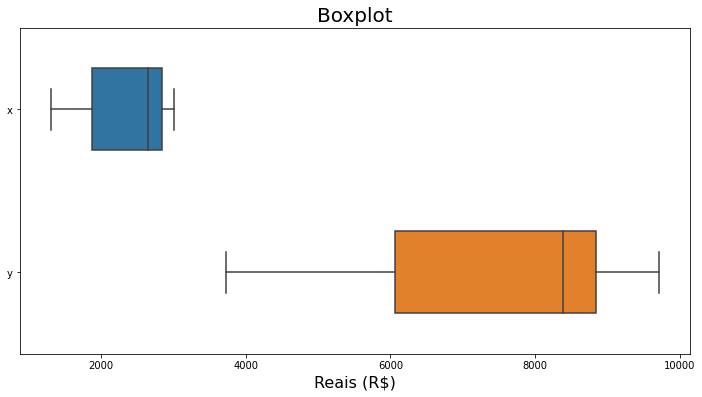

In [11]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

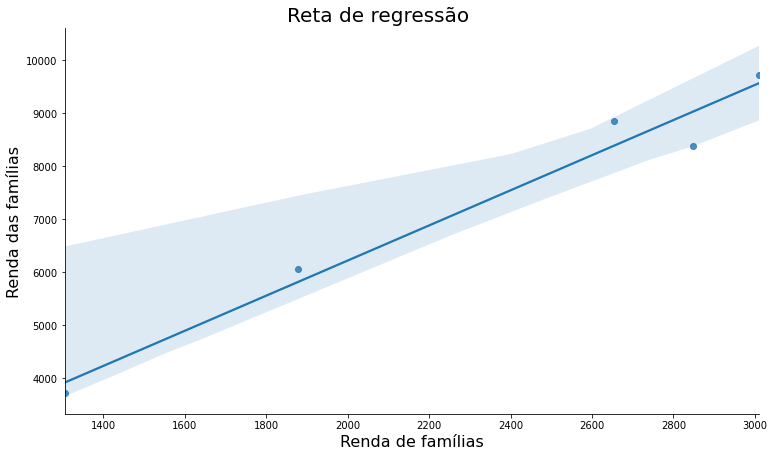

In [19]:
ax = sns.lmplot(data=dataset, x='x', y='y')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão', fontsize=20, y=1.02)
ax.set_xlabels('Renda de famílias', fontsize=16)
ax.set_ylabels('Renda das famílias', fontsize=16)
ax

In [20]:
dataset.corr()

,x,y
x,1.000000,0.983926
y,0.983926,1.000000


In [21]:
import statsmodels.api as sm

In [22]:
y = dataset.y
x = sm.add_constant(dataset.x)

In [23]:
y.head()

0    9714
1    3728
2    6062
3    8845
4    8378
Name: y, dtype: int64

In [24]:
x.head()

,const,x
0,1.0,3011
1,1.0,1305
2,1.0,1879
3,1.0,2654
4,1.0,2849


In [25]:
resultado = sm.OLS(y, x).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     91.07
Date:                Wed, 07 Apr 2021   Prob (F-statistic):            0.00244
Time:                        18:01:05   Log-Likelihood:                -36.906
No. Observations:                   5   AIC:                             77.81
Df Residuals:                       3   BIC:                             77.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -396.4944    841.680     -0.471      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [26]:
dataset['y_pred'] = resultado.predict()
dataset

,x,y,y_pred
0,3011,9714,9567.107946
1,1305,3728,3921.838723
2,1879,6062,5821.243491
3,2654,8845,8385.770835
4,2849,8378,9031.039005
